In [196]:
%matplotlib inline
import numpy as np
import random as rd
import math
import matplotlib.pyplot as plt
import statistics as stat

In [63]:
n = 10
cluster_mean = np.array([1,1])
means = np.tile(cluster_mean,(n,1))
cov = np.array([[5,-3],[-3,5]])
test = np.random.multivariate_normal(cluster_mean,cov,1000)

In [64]:
print(cov)
print(np.shape(test))

[[ 5 -3]
 [-3  5]]
(1000, 2)


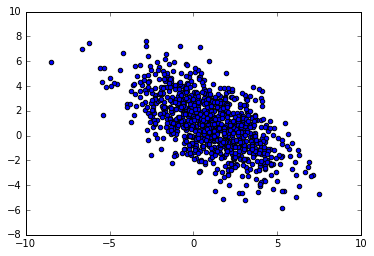

In [65]:
plt.scatter(test[:,0],test[:,1])

In [70]:
centroid_list = [np.array([1,1]), np.array([0,0])]
cov_list = [np.array([[5,-3],[-3,5]]), np.array([[5,3],[3,5]])]
num_points = 100
point_split = [1/2, 1/2]
print(len(centroid_list))
print(len(cov_list))

2
2


In [197]:
def k_means_datafaker(k, centroid_list, dist_chars_list, points_splt):
    
    if len(centroid_list) != k:
        print('You ust provide a centroid x,y pair for every cluster')
    if len(dist_chars_list) != k:
        print('You ust provide a covariance matrix for every cluster')
    if len(points_splt) != k:
        print('You ust provide a number of points for every cluster')
        
    total_points = sum(points_splt)    
    points = np.empty([total_points,3])
    
    index = 0
    for i in range(k):

        centroid = centroid_list[i]
        dist_chars = dist_chars_list[i]
        p = points_splt[i]

        points_in_cluster = np.random.multivariate_normal(centroid,dist_chars,p)
        
        points[index:index+p,:2] = points_in_cluster
        points[index:index+p,2] = i+1

        index = index+p

    return points

In [228]:
centroid_list = [np.array([10,10]), np.array([-10,-10]), np.array([10,-10])]
cov_list = [np.array([[5,0],[0,5]]), np.array([[2,-1],[-1,2]]), np.array([[0.5,0],[0,0.5]])]
points_split = [100,100,100]

test_points_3k = k_means_datafaker(3, centroid_list, cov_list, points_split)

In [233]:
centroid_list_2k = [np.array([10,10]), np.array([-10,-10])]
cov_list_2k = [np.array([[5,0],[0,5]]), np.array([[2,-1],[-1,2]])]
points_split_2k = [100,100]

test_points_2k = k_means_datafaker(2, centroid_list_2k, cov_list_2k, points_split_2k)

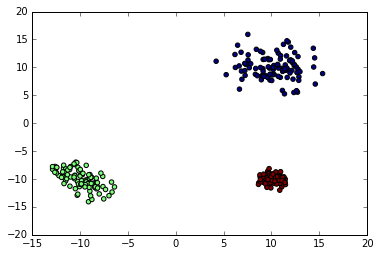

In [234]:
plt.scatter(test_points_3k[:,0],test_points_3k[:,1], c = test_points_3k[:,2])

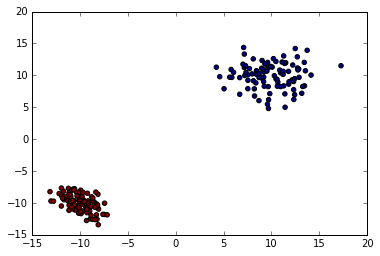

In [235]:
plt.scatter(test_points_2k[:,0],test_points_2k[:,1], c = test_points_2k[:,2])

In [194]:
def comparison_function(generating_centroids, kmeans_centroids):
    
    distance_array = np.empty([len(generating_centroids)*len(kmeans_centroids),3])
    assigment_array = np.empty([len(generating_centroids),3])
    
    for i, gen_cent in enumerate(genertating_centroids):
        for j, kmeans_cent in enumerate(kmeans_centroids):
            
            x_1 = genertating_centroids[i][0]
            y_1 = genertating_centroids[i][1]
            
            x_2 = kmeans_centroids[j][0]
            y_2 = kmeans_centroids[j][1]
            
            distance = np.sqrt(np.square(x_1 - x_2) + np.square(y_1 - y_2))
            
            

In [236]:
def kmeans(points, k,prec=0.0001,m=1):
    l=len(points)
    if k > l:
        print ('The partitioning is impossible')
    else:
        centroids = np.empty([k,2])
        for j in range(0, k):
            centroids[j,:]=points[j,:]
        while (m > prec):
            new_centroids=np.empty([k,2])
            list_index=[]
            for i in range(0,l):
                list_dist=[]
                for j in range(0,k):
                    dist=np.linalg.norm(points[i,:] - centroids[j,:])
                    list_dist.append(dist)
                min_index=np.argmin(list_dist)
                list_index.append(min_index)
            for j in range(0,k):
                indeces=np.where(np.asarray(list_index)==j)[0]
                if len(indeces) > 0:
                    new_centroids[j,:]=sum(points[indeces])/(len(indeces))
                else:
                    rand_int=rd.randint(0,l-1)
                    new_centroids[j,:]=points[rand_int,:]
            m=np.linalg.norm(centroids - new_centroids)
            centroids=new_centroids
            
        list_diameter=[]   
        for j in range(0,k):
            indeces=np.where(np.asarray(list_index)==j)[0]
            diameter=math.sqrt(sum(np.linalg.norm(points[indeces]- centroids[j,:],axis=1)**2)/len(indeces))
            list_diameter.append(diameter)
        Matrix_DB= np.zeros([k,k])
        for i in range(0,k):
            for j in range(0,i-1):
                Matrix_DB[i,j]=(list_diameter[i]+list_diameter[j])/(np.linalg.norm(centroids[i,:]-centroids[j,:]))
            for j in range(i+1,k):
                Matrix_DB[i,j]=(list_diameter[i]+list_diameter[j])/(np.linalg.norm(centroids[i,:]-centroids[j,:])) 
            
        DB=sum(np.amax(Matrix_DB, axis=1))/k
    
    
    return centroids, list_index, m, DB

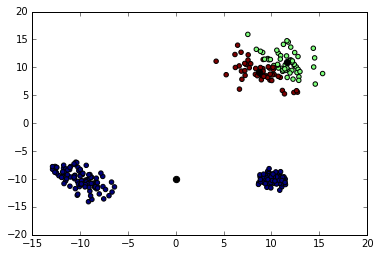

In [252]:
points= test_points_3k[:,:2]
centro, listo,mo,DBo=kmeans(points,3)
plt.scatter(points[:,0], points[:,1], c=listo)
plt.scatter(centro[:,0], centro[:,1],marker='o',color='black', s=40)

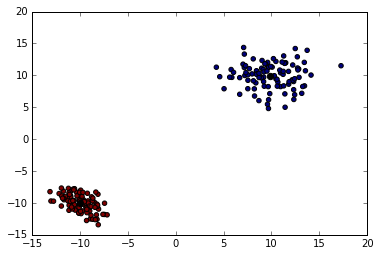

In [251]:
points= test_points_2k[:,:2]
centro, listo,mo,DBo=kmeans(points,2)
plt.scatter(points[:,0], points[:,1], c=listo)
plt.scatter(centro[:,0], centro[:,1],marker='o',color='black', s=40)

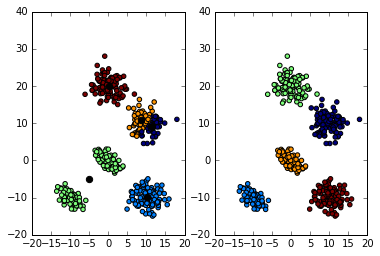

In [265]:
centroid_list_5k = [np.array([10,10]), 
                    np.array([-10,-10]), 
                    np.array([0,20]), 
                    np.array([0,0]),
                    np.array([10,-10])]
cov_list_5k = [np.array([[5,0],[0,5]]), 
               np.array([[2,-1],[-1,2]]),
               np.array([[5,0],[0,5]]), 
               np.array([[2,-1],[-1,2]]),
               np.array([[5,0],[0,5]])]
points_split_5k = [100,100,100,100,100]

test_points_5k = k_means_datafaker(5, centroid_list_5k, cov_list_5k, points_split_5k)

points= test_points_5k[:,:2]
centro, listo,mo,DBo=kmeans(points,5)

fig, axs = plt.subplots(1,2)

axs[0].scatter(points[:,0], points[:,1], c=listo)
axs[0].scatter(centro[:,0], centro[:,1],marker='o',color='black', s=40)

axs[1].scatter(test_points_5k[:,0], test_points_5k[:,1], c=test_points_5k[:,2])
#axs[1].scatter(centroid_list_5k[:,0], centroid_list_5k[:,1],marker='o',color='black', s=40)